In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
cash_balance = pd.read_csv('POS_CASH_balance.csv')

In [3]:
cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


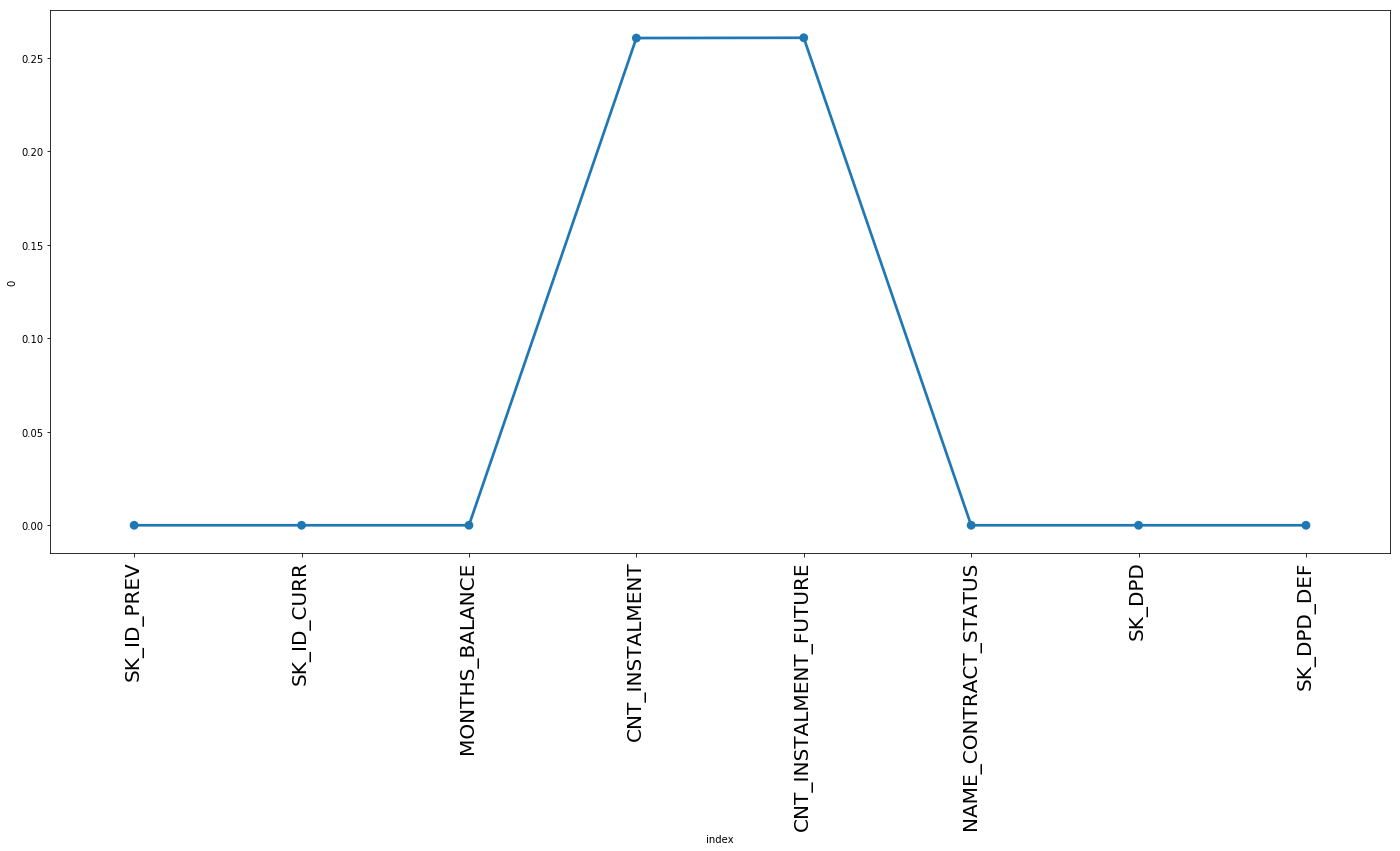

In [5]:
fig = plt.figure(figsize=(24,10))
miss = pd.DataFrame((cash_balance.isnull().sum()*100)/cash_balance.shape[0]).reset_index()
ax = sns.pointplot(x='index', y=0, data=miss)
plt.xticks(rotation=90, fontsize=20)
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


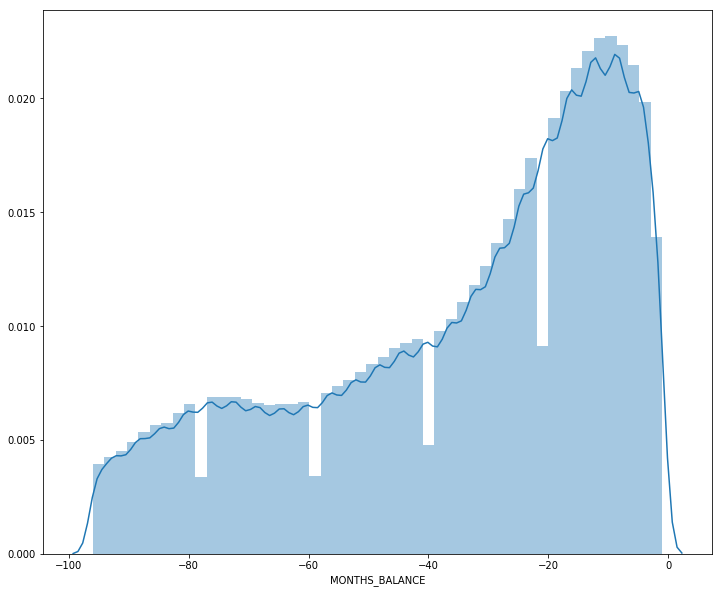

In [4]:
plt.figure(figsize=(12,10))
sns.distplot(cash_balance['MONTHS_BALANCE'])
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


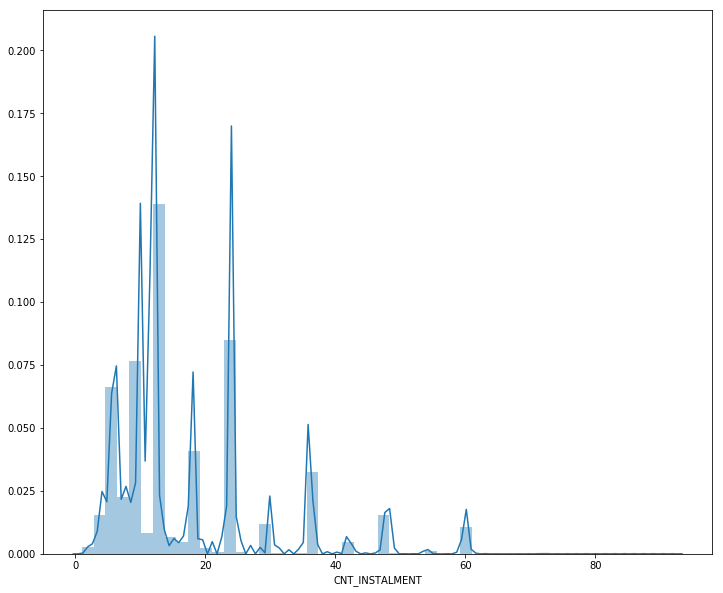

In [7]:
plt.figure(figsize=(12,10))
sns.distplot(cash_balance['CNT_INSTALMENT'].dropna())
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


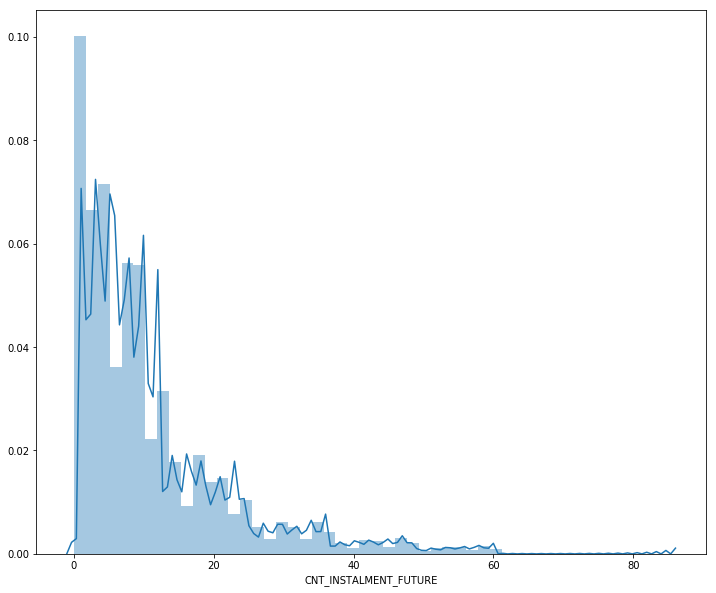

In [8]:
plt.figure(figsize=(12,10))
sns.distplot(cash_balance['CNT_INSTALMENT_FUTURE'].dropna())
plt.show()

In [24]:
cash_balance['PERCENT_COMPLETION'] = (cash_balance['CNT_INSTALMENT']-cash_balance['CNT_INSTALMENT_FUTURE'])/cash_balance['CNT_INSTALMENT']

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


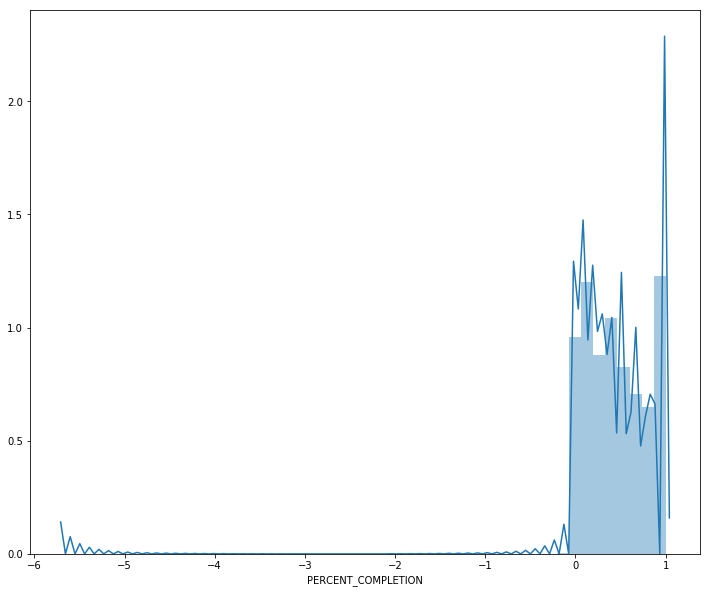

In [10]:
plt.figure(figsize=(12,10))
sns.distplot(cash_balance['PERCENT_COMPLETION'].dropna())
plt.show()

In [11]:
cash_balance[cash_balance['PERCENT_COMPLETION']<0]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,PERCENT_COMPLETION
7319,2653109,330960,-40,36.0,37.0,Active,0,0,-0.027778
15686,1455065,221243,-20,6.0,7.0,Active,0,0,-0.166667
22832,1381023,176282,-14,60.0,61.0,Active,0,0,-0.016667
51364,2824585,336653,-38,6.0,7.0,Active,0,0,-0.166667
60508,1818372,106590,-18,6.0,7.0,Active,0,0,-0.166667
60509,1748052,386747,-15,6.0,7.0,Active,0,0,-0.166667
62135,2807828,361554,-16,24.0,25.0,Active,0,0,-0.041667
66351,1251074,321705,-16,36.0,37.0,Active,0,0,-0.027778
83956,2618573,356444,-18,24.0,25.0,Active,0,0,-0.041667
83957,1456418,237026,-14,24.0,25.0,Active,0,0,-0.041667


In [12]:
cash_balance['NAME_CONTRACT_STATUS'].value_counts()

Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: NAME_CONTRACT_STATUS, dtype: int64

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


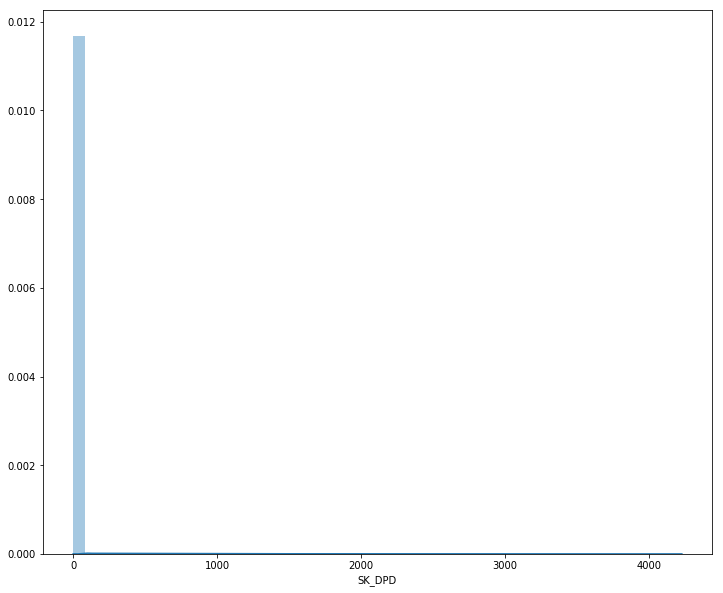

In [13]:
plt.figure(figsize=(12,10))
sns.distplot(cash_balance['SK_DPD'].dropna())
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


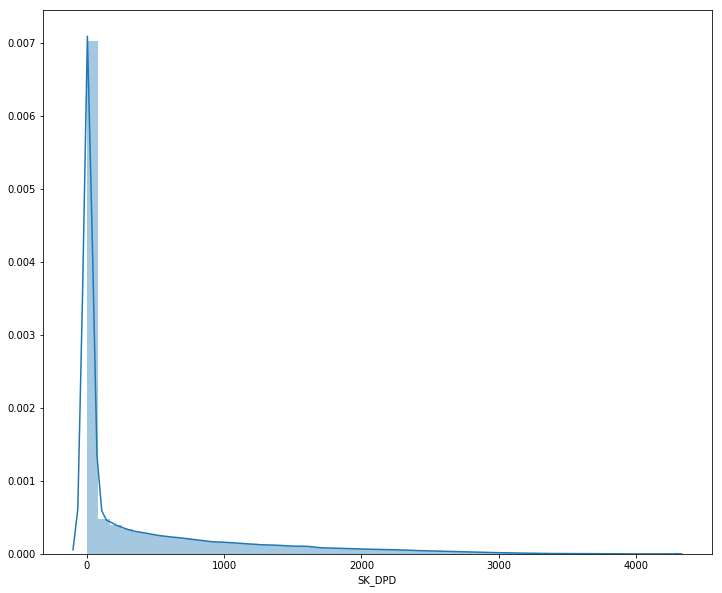

In [14]:
plt.figure(figsize=(12,10))
sns.distplot(cash_balance[cash_balance['SK_DPD']>0]['SK_DPD'].dropna())
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


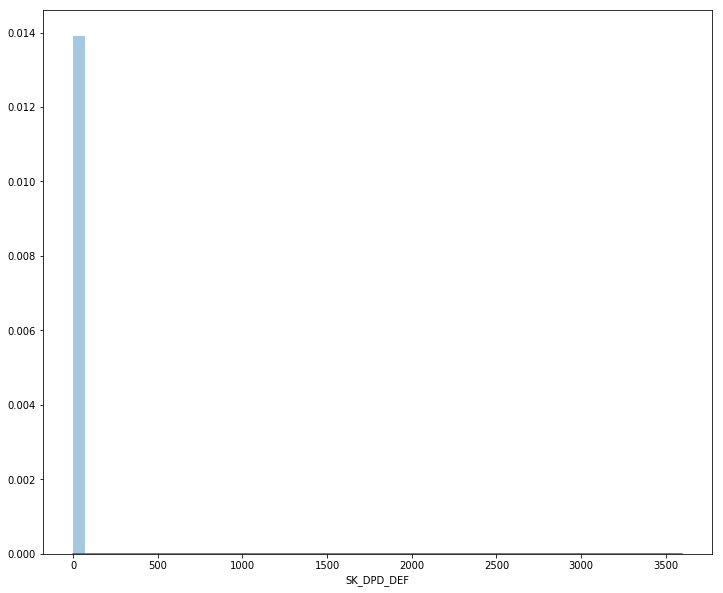

In [15]:
plt.figure(figsize=(12,10))
sns.distplot(cash_balance['SK_DPD_DEF'].dropna())
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


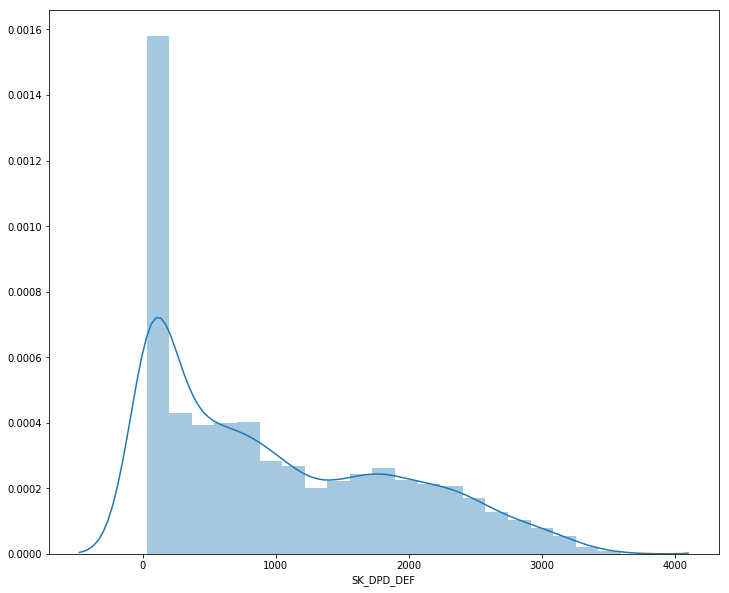

In [17]:
plt.figure(figsize=(12,10))
sns.distplot(cash_balance[cash_balance['SK_DPD_DEF']>30]['SK_DPD_DEF'].dropna())
plt.show()

In [4]:
insta = pd.read_csv('installments_payments.csv')

In [7]:
insta.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


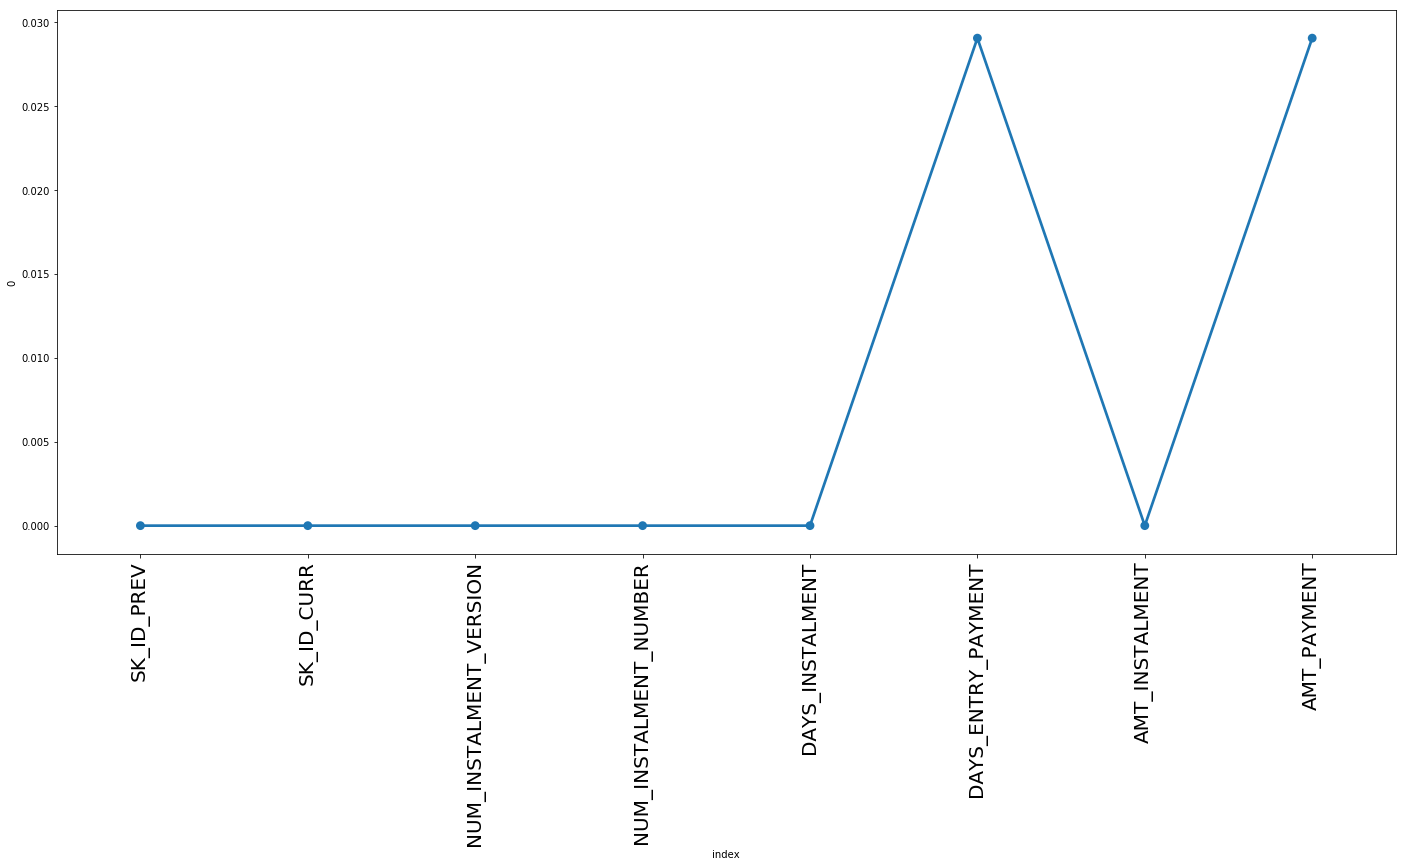

In [9]:
fig = plt.figure(figsize=(24,10))
miss = pd.DataFrame((insta.isnull().sum()*100)/cash_balance.shape[0]).reset_index()
ax = sns.pointplot(x='index', y=0, data=miss)
plt.xticks(rotation=90, fontsize=20)
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


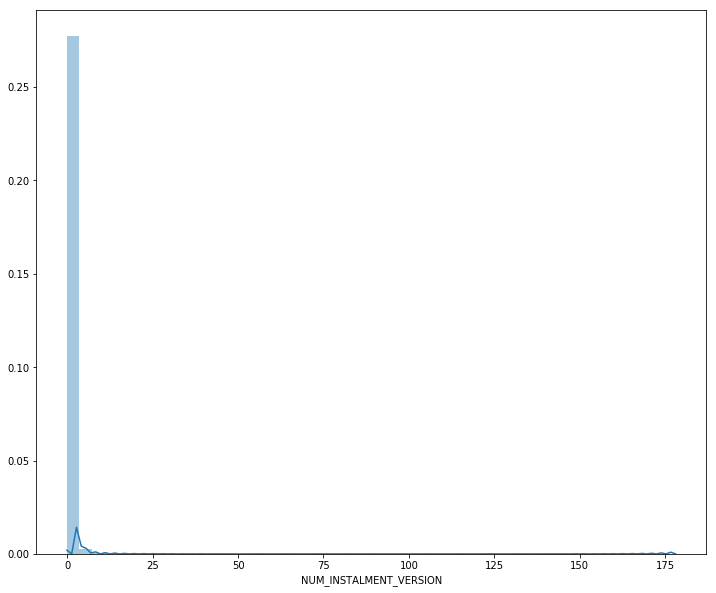

In [21]:
plt.figure(figsize=(12,10))
sns.distplot(insta['NUM_INSTALMENT_VERSION'].dropna())
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


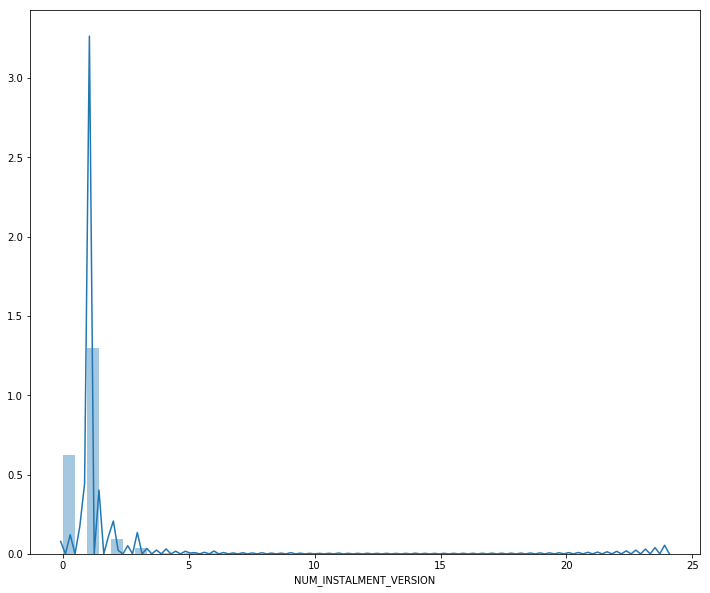

In [25]:
plt.figure(figsize=(12,10))
sns.distplot(insta[insta['NUM_INSTALMENT_VERSION']<25]['NUM_INSTALMENT_VERSION'].dropna())
plt.show()

In [23]:
insta.shape

(13605401, 8)

In [24]:
insta['SK_ID_PREV'].nunique()

997752

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


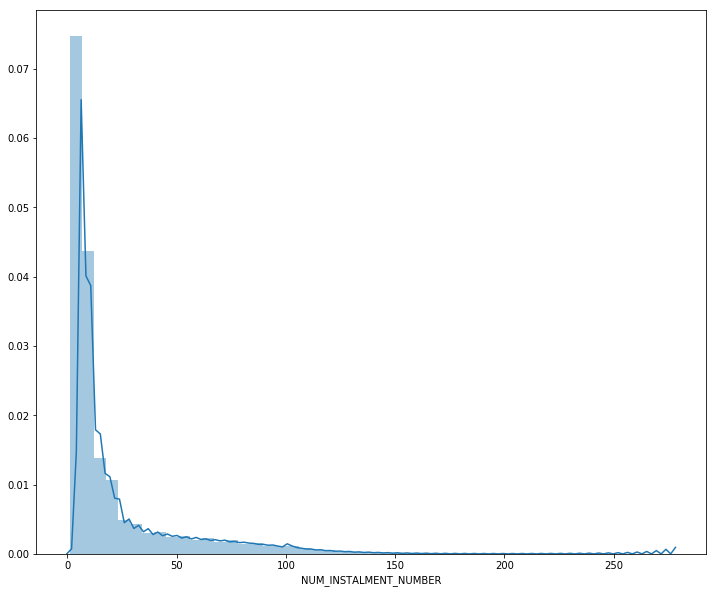

In [26]:
plt.figure(figsize=(12,10))
sns.distplot(insta['NUM_INSTALMENT_NUMBER'].dropna())
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


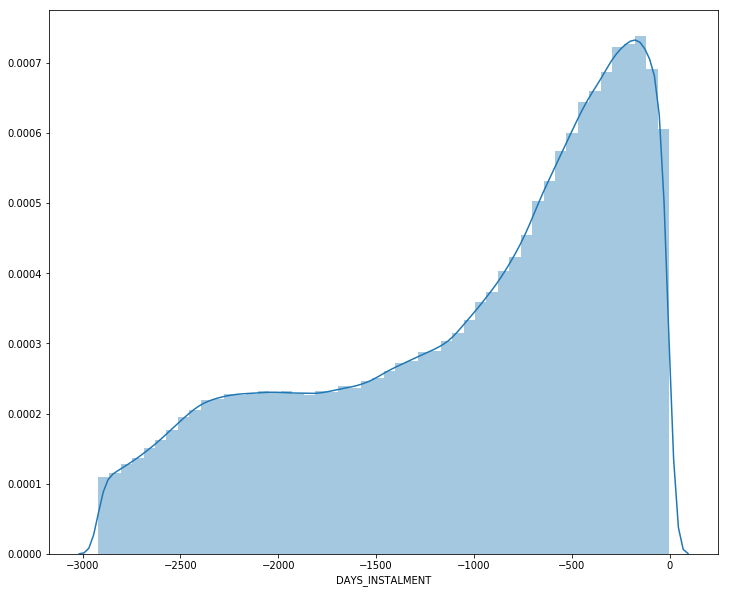

In [27]:
plt.figure(figsize=(12,10))
sns.distplot(insta['DAYS_INSTALMENT'].dropna())
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


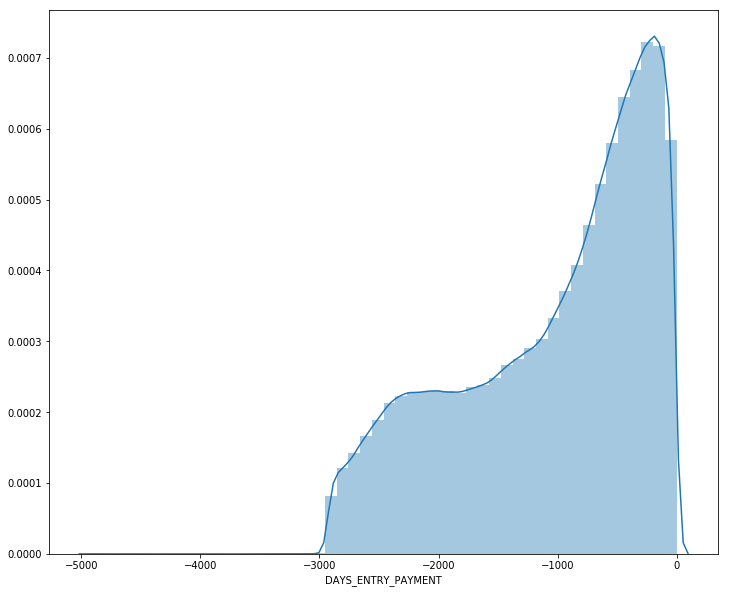

In [28]:
plt.figure(figsize=(12,10))
sns.distplot(insta['DAYS_ENTRY_PAYMENT'].dropna())
plt.show()

In [5]:
insta['LATE_PAYMENT_DAYS'] = insta['DAYS_ENTRY_PAYMENT'] - insta['DAYS_INSTALMENT']

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


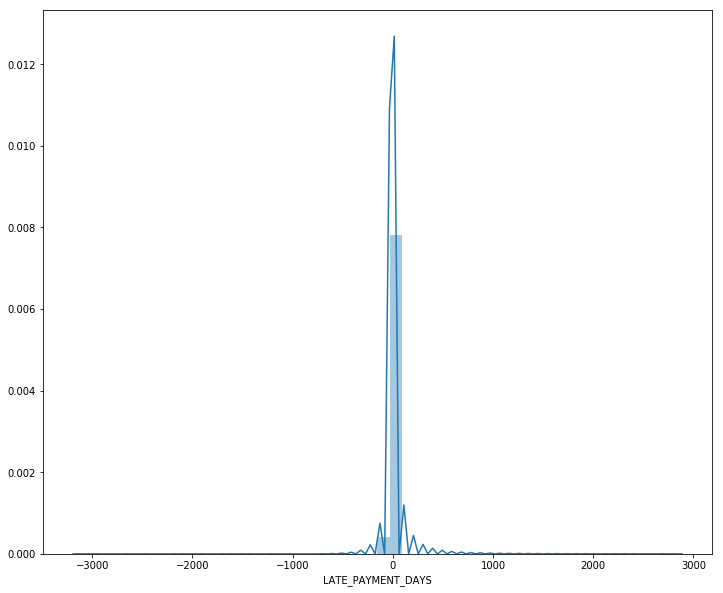

In [30]:
plt.figure(figsize=(12,10))
sns.distplot(insta['LATE_PAYMENT_DAYS'].dropna())
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


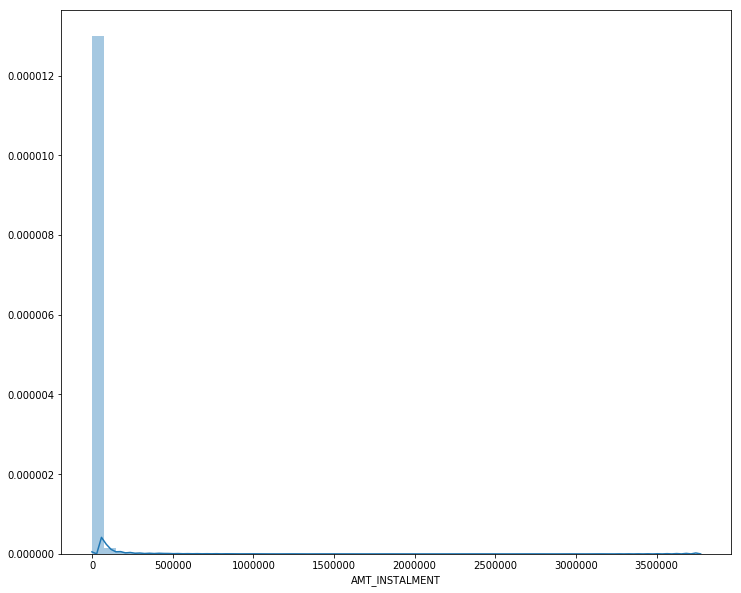

In [32]:
plt.figure(figsize=(12,10))
sns.distplot(insta['AMT_INSTALMENT'].dropna())
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


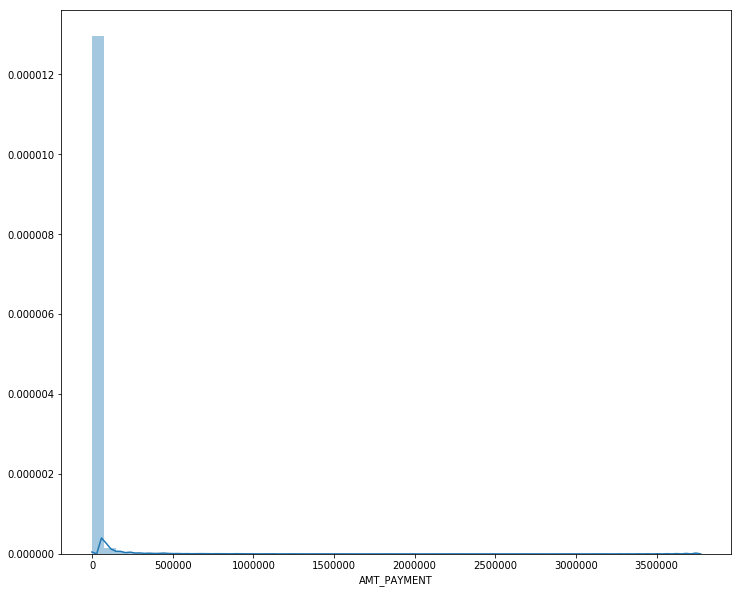

In [33]:
plt.figure(figsize=(12,10))
sns.distplot(insta['AMT_PAYMENT'].dropna())
plt.show()

In [6]:
insta['YOKIAN_SCORE'] = (insta['AMT_PAYMENT'] - insta['AMT_INSTALMENT'])/(insta['AMT_INSTALMENT']+1)

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


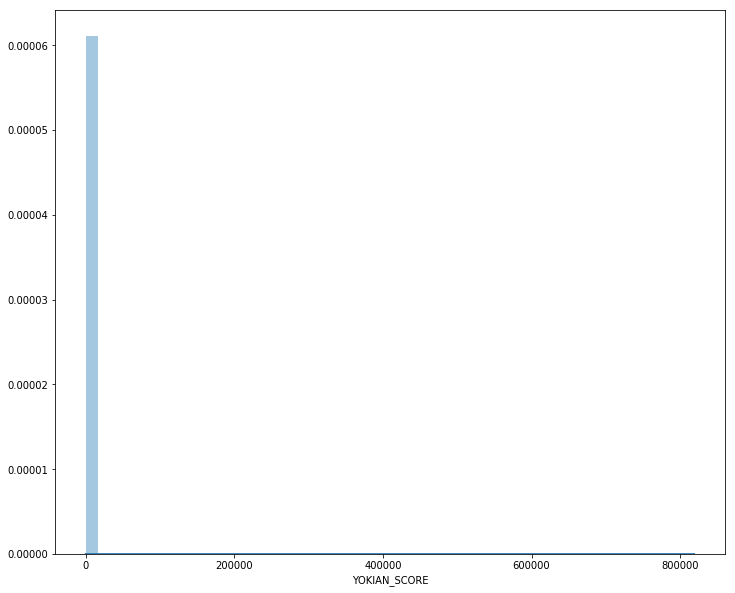

In [39]:
plt.figure(figsize=(12,10))
sns.distplot(insta['YOKIAN_SCORE'].dropna())
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


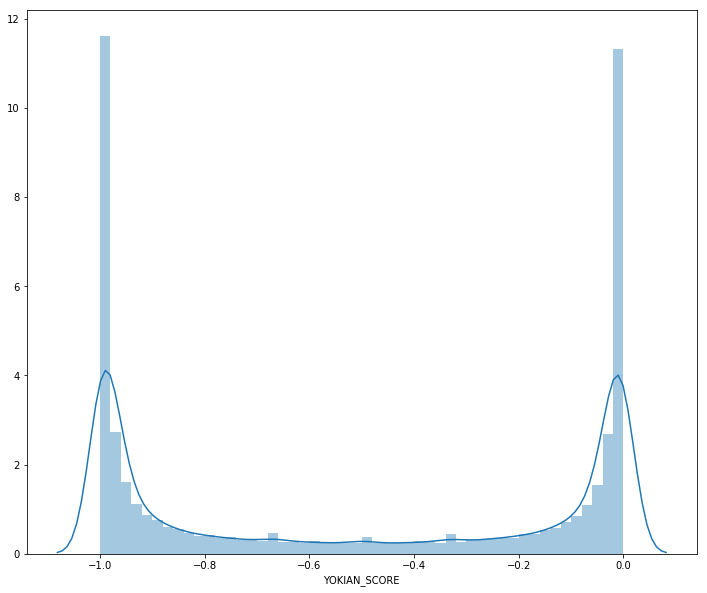

In [41]:
plt.figure(figsize=(12,10))
sns.distplot(insta[insta['YOKIAN_SCORE']<0]['YOKIAN_SCORE'].dropna())
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


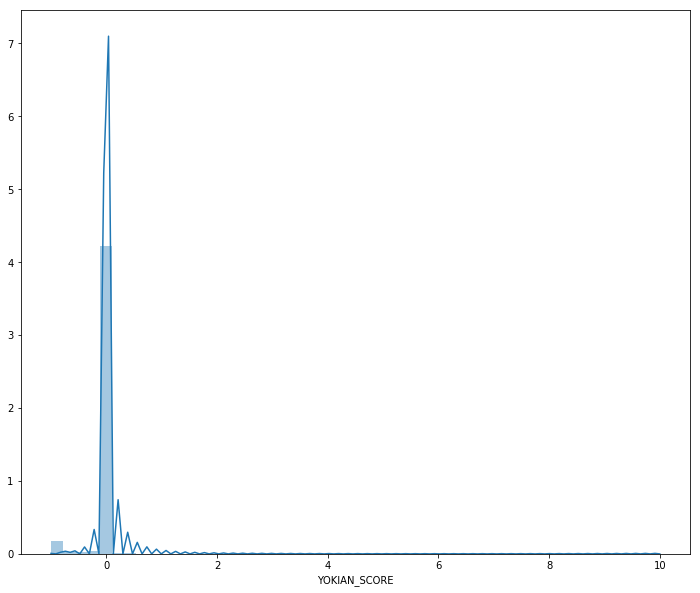

In [47]:
plt.figure(figsize=(12,10))
sns.distplot(insta[insta['YOKIAN_SCORE']<10]['YOKIAN_SCORE'].dropna())
plt.show()

In [7]:
insta_grpd_payment = insta.groupby('SK_ID_PREV').mean()

In [8]:
insta_grpd_payment.head(10)

,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,LATE_PAYMENT_DAYS,YOKIAN_SCORE
SK_ID_PREV,,,,,,,,,
1000001,158271.0,1.500000,1.500000,-253.000000,-269.000000,34221.712500,34221.712500,-16.000000,0.000000
1000002,101962.0,1.250000,2.500000,-1555.000000,-1574.750000,9308.891250,9308.891250,-19.750000,0.000000
1000003,252457.0,1.000000,2.000000,-64.000000,-79.333333,4951.350000,4951.350000,-15.333333,0.000000
1000004,260094.0,1.142857,4.000000,-772.000000,-798.714286,4789.022143,4789.022143,-26.714286,0.000000
1000005,176456.0,1.000000,5.818182,-1543.454545,-1551.909091,14703.210000,13365.609545,-8.454545,-0.090903
1000007,256657.0,1.000000,3.000000,-63.000000,-79.800000,11246.805000,11246.805000,-16.800000,0.000000
1000008,152059.0,1.111111,5.000000,-1162.000000,-1198.555556,29137.620000,29137.620000,-36.555556,0.000000
1000009,343078.0,1.000000,3.500000,-382.000000,-391.666667,9302.602500,9302.602500,-9.666667,0.000000
1000010,377567.0,1.090909,6.000000,-408.000000,-418.363636,114514.830000,114514.830000,-10.363636,0.000000


In [9]:
insta_grpd_curr = insta_grpd_payment.groupby('SK_ID_CURR').mean()

In [25]:
cash_balance[cash_balance['CNT_INSTALMENT'].isnull()]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,PERCENT_COMPLETION
709,1889585,403422,-6,NaN,NaN,Signed,0,0,NaN
759,1618886,382448,-2,NaN,NaN,Signed,0,0,NaN
1887,2288203,429576,-6,NaN,NaN,Signed,0,0,NaN
1899,2110224,167171,-6,NaN,NaN,Signed,0,0,NaN
1910,2031967,235187,-5,NaN,NaN,Signed,0,0,NaN
3376,1683317,185455,-44,NaN,NaN,Signed,0,0,NaN
5802,2619122,340969,-4,NaN,NaN,Returned to the store,0,0,NaN
7540,2770178,282094,-33,NaN,NaN,Signed,0,0,NaN
8119,1910110,278474,-33,NaN,NaN,Signed,0,0,NaN
8629,1112804,251721,-10,NaN,NaN,Signed,0,0,NaN


In [26]:
cash_balance['CNT_INSTALMENT'].fillna(cash_balance.CNT_INSTALMENT.median(), inplace=True)

In [27]:
cash_balance['CNT_INSTALMENT_FUTURE'].fillna(cash_balance.CNT_INSTALMENT_FUTURE.median(), inplace=True)

In [28]:
cash_balance = pd.concat([cash_balance, pd.get_dummies(cash_balance['NAME_CONTRACT_STATUS'])], axis=1).drop('NAME_CONTRACT_STATUS', axis=1)

In [29]:
cash_balance['PERCENT_COMPLETION'].fillna(cash_balance['PERCENT_COMPLETION'].median(), inplace=True)

In [30]:
cash_balance['SK_ID_PREV'].nunique()

936325

In [31]:
cash_balance.shape

(10001358, 17)

In [32]:
cash_balance_grpd_payment = cash_balance.groupby('SK_ID_PREV').mean()

In [33]:
cash_balance_grpd_appl = cash_balance.groupby('SK_ID_CURR').mean()

In [34]:
cash_balance_and_instalment = pd.concat([cash_balance_grpd_appl, insta_grpd_curr], axis=1)

In [35]:
cash_balance_and_instalment.to_csv('pos_cash_balance_and_installments_ready_to_be_attached_to_appl')